# Task 6. Algorithms on graphs. Path search algorithms on weighted graphs

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time
import random

A generation of a random adjacency matrix for a simple undirected weighted graph with assigned random positive integer weights.

In [2]:
n, m = 100, 500
graph = nx.generators.random_graphs.gnm_random_graph(n, m)


for (u,v,w) in graph.edges(data=True):
    w['weight'] = random.randint(0,10)

Visualisation of the graph.

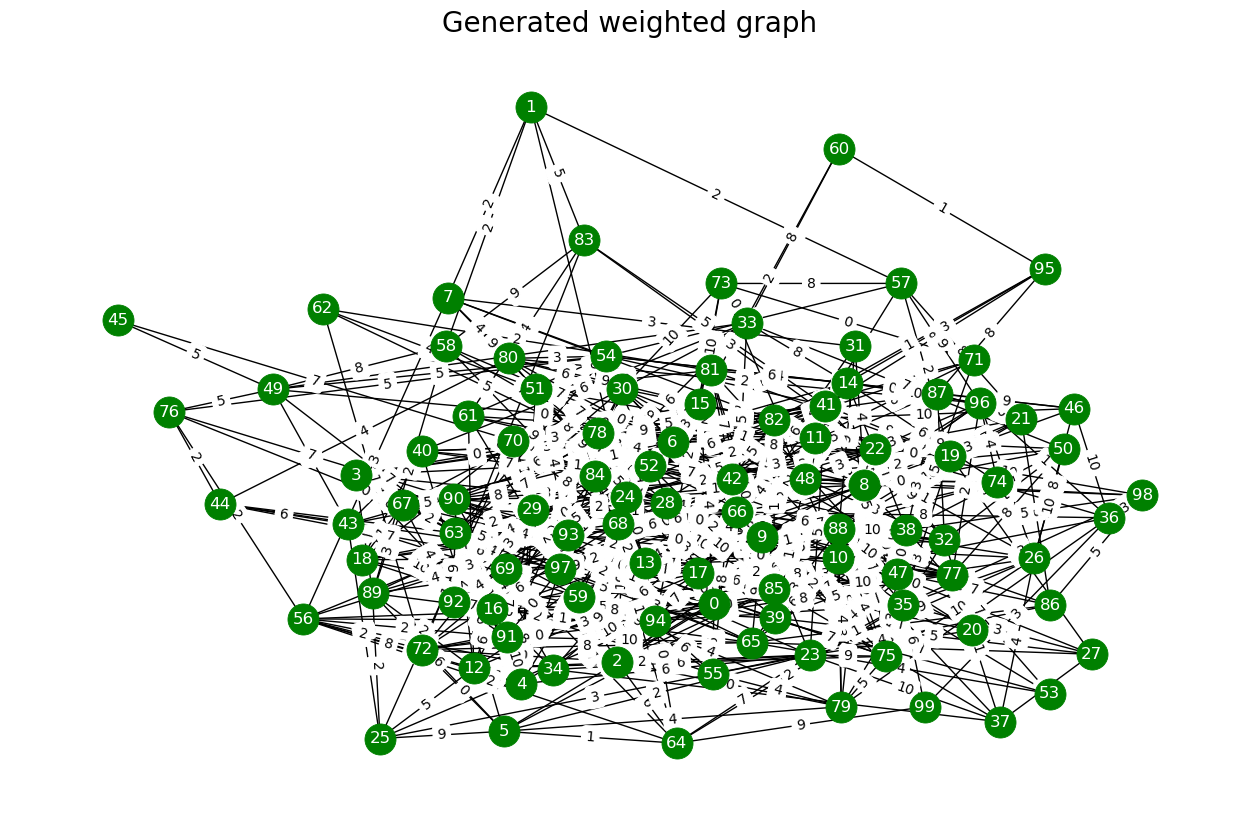

In [3]:
pos = nx.spring_layout(graph, iterations=500, seed=1000)

plt.figure(figsize=(16, 10))
plt.title('Generated weighted graph', fontsize=20)

nx.draw(graph, pos,
        with_labels=True,
        node_size=500,
        font_color='white',
        node_color='green',
        linewidths=0.6)

edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

plt.savefig('weighted_graph.pdf')
plt.show()

In [4]:
source = random.choice(list(graph.nodes()))

In [5]:
t = []
for i in range(10):
    t_init = time.time()
    shortest_path_dijkstra = nx.single_source_dijkstra(graph, source)
    t.append(time.time() - t_init)

print('Mean execution time for DA: ', round(sum(t)/len(t), 5), 's')   

Mean execution time for DA:  0.00101 s


In [6]:
t = []
for i in range(10):
    t_init = time.time()
    shortest_path_bf = nx.single_source_bellman_ford(graph, source, weight='weight')
    t.append(time.time() - t_init)

print('Mean execution time for BFA: ', round(sum(t)/len(t), 5), 's')   

Mean execution time for BFA:  0.00465 s


Creation and visualisation a 10$\times$20 cell grid graph.

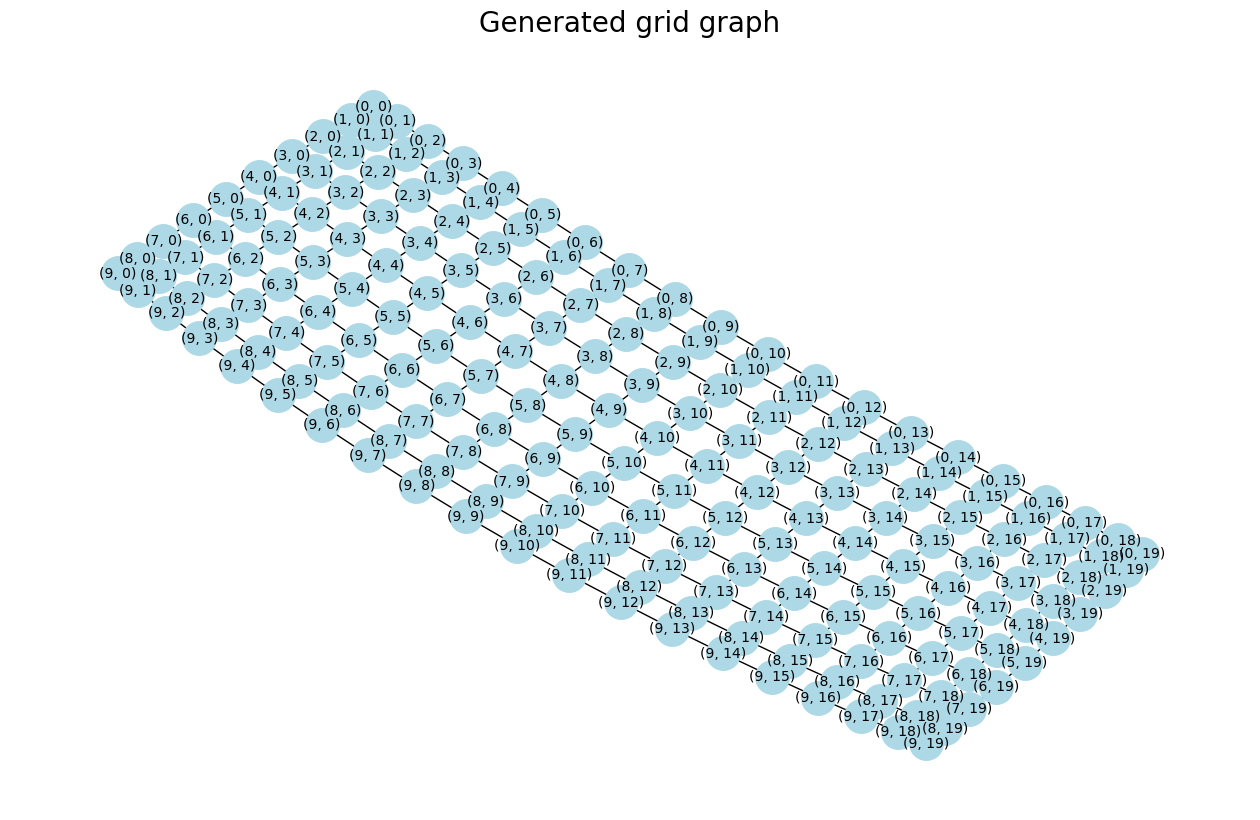

In [7]:
grid_graph = nx.grid_2d_graph(10, 20)

pos = nx.spring_layout(grid_graph, iterations=1000, seed=1000)

plt.figure(figsize=(16, 10))
plt.title('Generated grid graph', fontsize=20)
nx.draw(grid_graph, pos, 
        with_labels=True,
        node_size=600,
        font_color='k', 
        font_size=10,
        node_color='lightblue',
        linewidths=0.6)

plt.savefig('grid_graph.pdf')
plt.show()

Selecting random source and target nodes and an obstacles creation. 

In [8]:
obstacles = [(x, y) for x in range(3, 7) for y in range(1, 10)]
obstacles.extend([(2, 16), (3, 16), (4, 16), (5, 16)])

grid_graph.remove_nodes_from(obstacles)

source, target = random.choice(list(grid_graph.nodes())), random.choice(list(grid_graph.nodes()))
print('Source node is', source, '\n', 'Target node is', target)

Source node is (1, 6) 
 Target node is (6, 18)


Applying the $A^*$ algorithm and visualisation the results. 

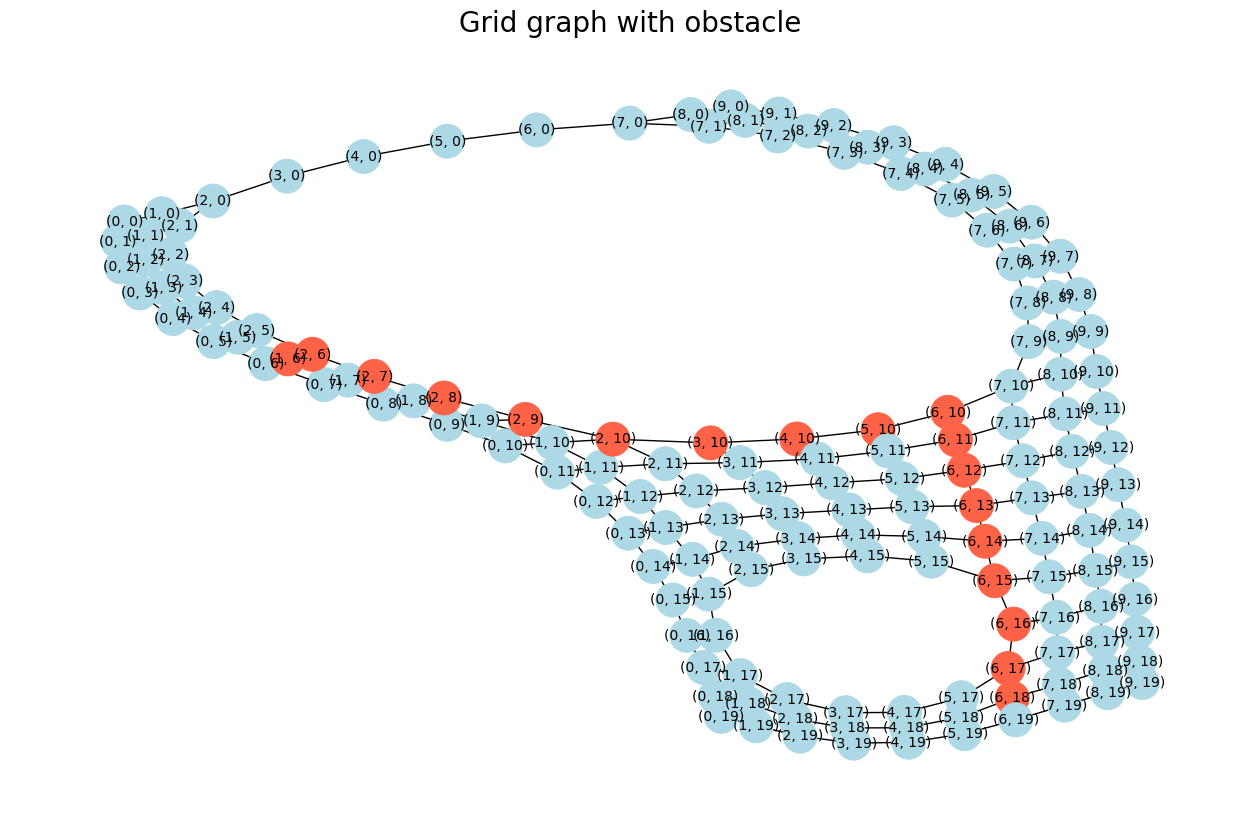

In [9]:
path = nx.astar_path(grid_graph, source, target, weight="cost")
node_colors = ['lightblue' if n not in path else 'tomato' for n in grid_graph.nodes()]
    
pos = nx.spring_layout(grid_graph, k=0.01, iterations=2000, seed=1000)

plt.figure(figsize=(16, 10))
plt.title('Grid graph with obstacle', fontsize=20)

nx.draw(grid_graph, pos, 
        with_labels=True,
        node_size=600,
        font_color='k', 
        font_size=10,
        node_color=node_colors,
        linewidths=0.6)

plt.savefig('astar_grid_graph.pdf')
plt.show()

Repeat four more times to compare the results.

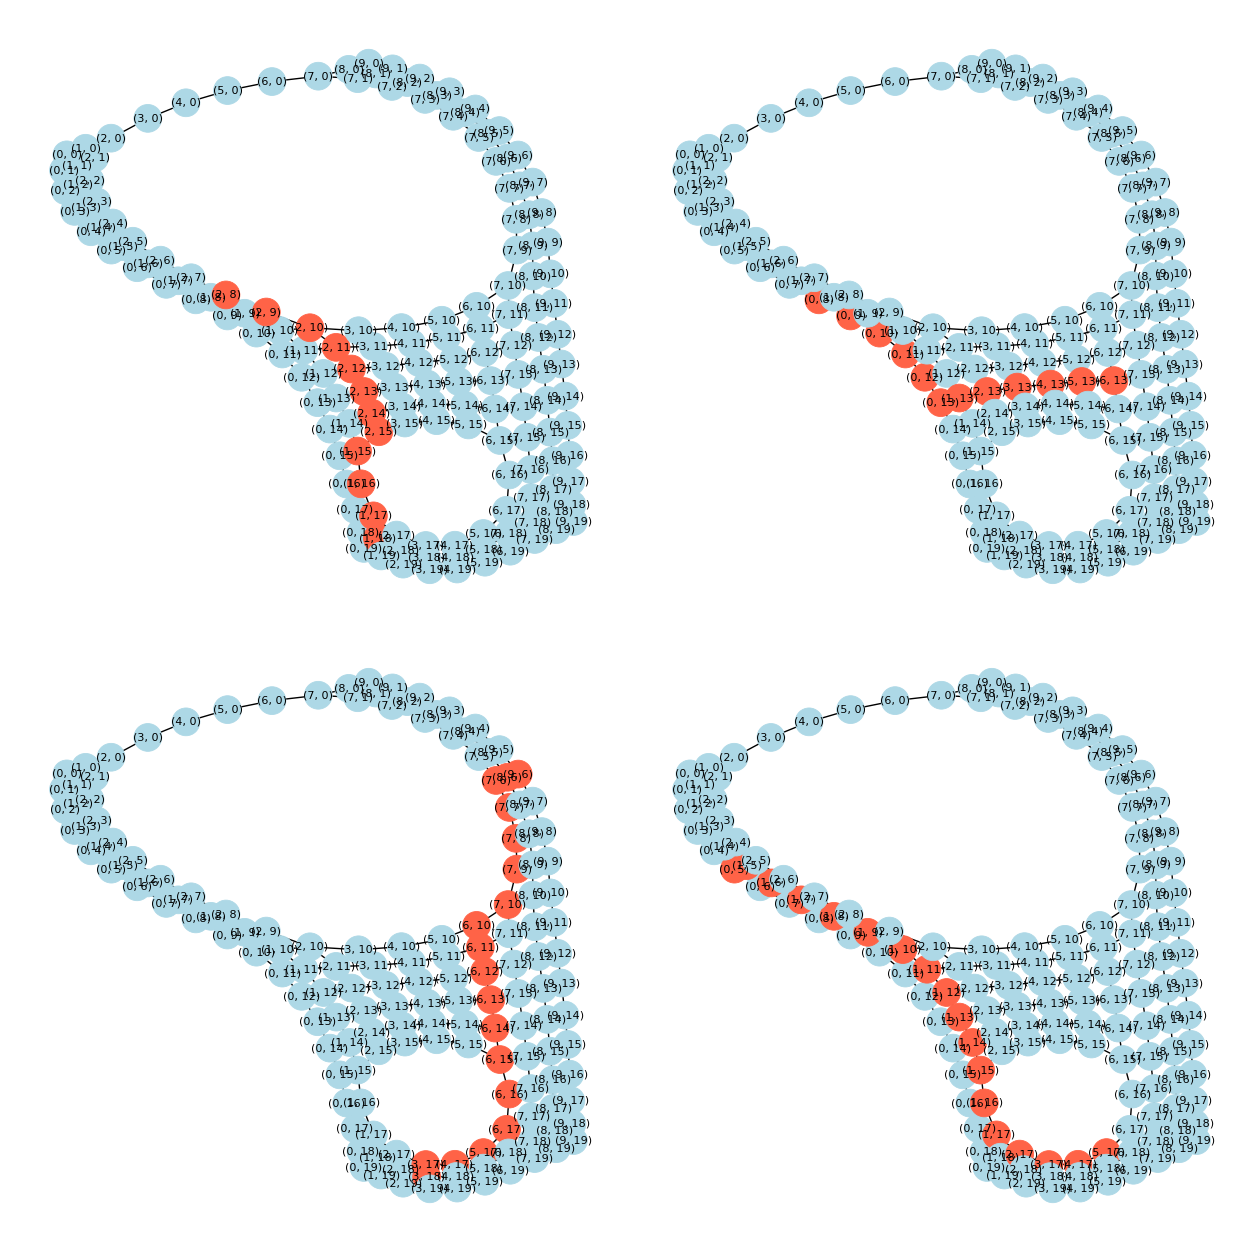

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16))
ax = ax.flatten()
plt.subplots_adjust(hspace=0.01, wspace=0.01)

for i in range(4):
    
    source, target = random.choice(list(grid_graph.nodes())), random.choice(list(grid_graph.nodes()))

    path = nx.astar_path(grid_graph, source, target)
    node_colors = ['lightblue' if n not in path else 'tomato' for n in grid_graph.nodes()]
    
    pos = nx.spring_layout(grid_graph, k=0.01, iterations=2000, seed=1000)
    
    nx.draw(grid_graph, pos, 
            ax=ax[i],
            with_labels=True,
            node_size=400,
            font_color='k', 
            font_size=8,
            node_color=node_colors,
            linewidths=0.6)
    
plt.savefig('astar_grid_graph_4.pdf')
plt.show()